In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv", sep=',')
df.head()

,Country,Value
0,United States,12394.0
1,Russia,6148.0
2,Germany (FRG),1653.0
3,France,2162.0
4,United Kingdom,1214.0


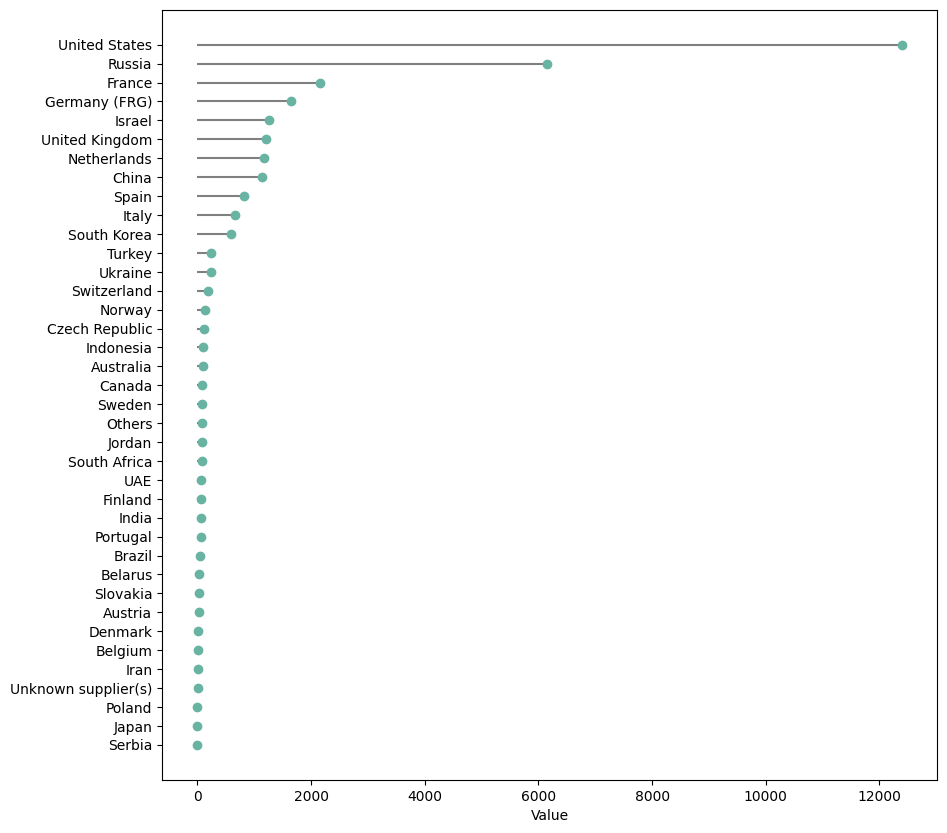

In [3]:
df = df.sort_values(by='Value')
df.dropna(inplace=True)
my_range=range(1,len(df.index)+1)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.hlines(y=my_range, xmin=0, xmax=df['Value'], color='grey')
plt.plot(df['Value'], my_range, "o",color="#69b3a2")
plt.yticks(my_range, df['Country'])
plt.xlabel('Value')
plt.show()

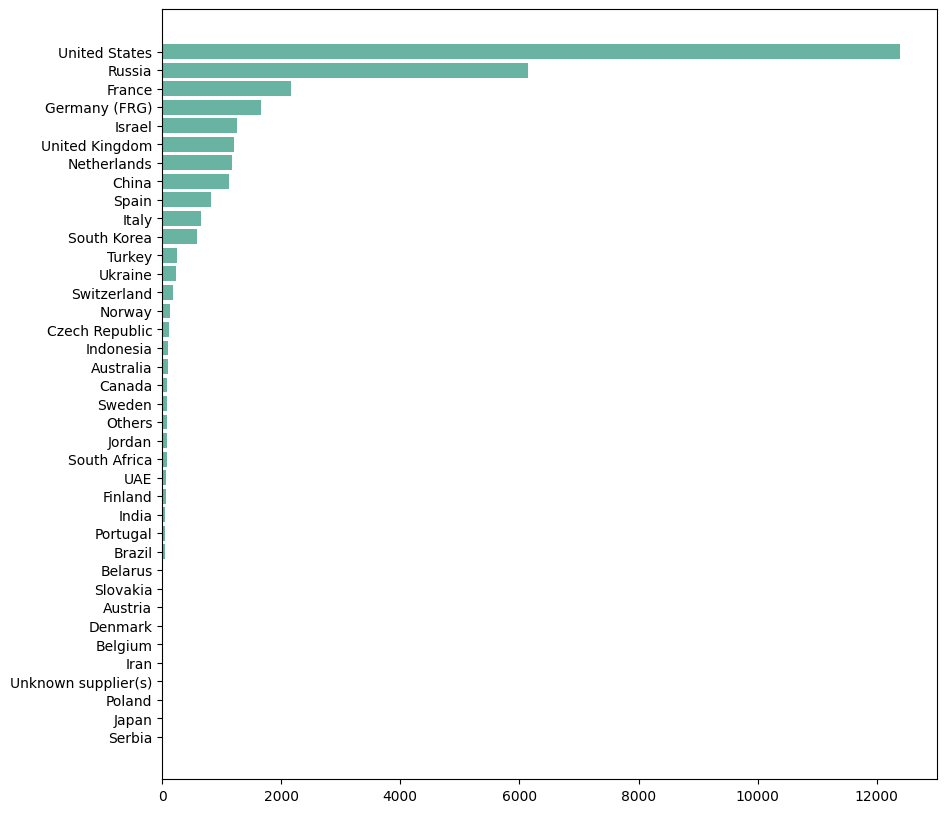

In [4]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.barh(my_range, df['Value'],color="#69b3a2")
plt.yticks(my_range, df['Country'])
plt.show()

In [5]:
import plotly.graph_objects as go

df = df.dropna(subset=['Value'])
df = df.sort_values(by='Value')
# Create the figure
fig = go.Figure()

# Add the bars
fig.add_trace(go.Barpolar(r=df['Value'], theta=df['Country'],
                         marker=dict(color='#69b3a2', line=dict(color='black', width=1))))

# Customize the layout
fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 13000])),
                  showlegend=False,
                  margin=dict(l=0, r=0, t=0, b=0),
                  polar_angularaxis=dict(tickfont=dict(size=10)))

fig.update_layout(title=dict(text="Who sells more weapons?", x=0.5, y=0.9))


# Show the plot
fig.show()

In [6]:
df2=pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/9_OneNumSevCatSubgroupOneObs.csv", sep=',')
df2

,Country,TIME,Value
0,Australia,2000,17.2
1,Australia,2005,15.8
2,Australia,2010,14.0
3,Australia,2015,13.0
4,Austria,2000,23.1
...,...,...,...
105,United Kingdom,2015,17.1
106,United States,2000,23.1
107,United States,2005,19.0
108,United States,2010,18.8


In [7]:
data_grp = df2.groupby('Country')
data_grp.first()

,TIME,Value
Country,,
Australia,2000,17.2
Austria,2000,23.1
Belgium,2000,13.6
Canada,2000,23.9
Chile,2000,6.1
Colombia,2010,6.4
Costa Rica,2015,3.7
Czech Republic,2000,19.1
Denmark,2005,10.2


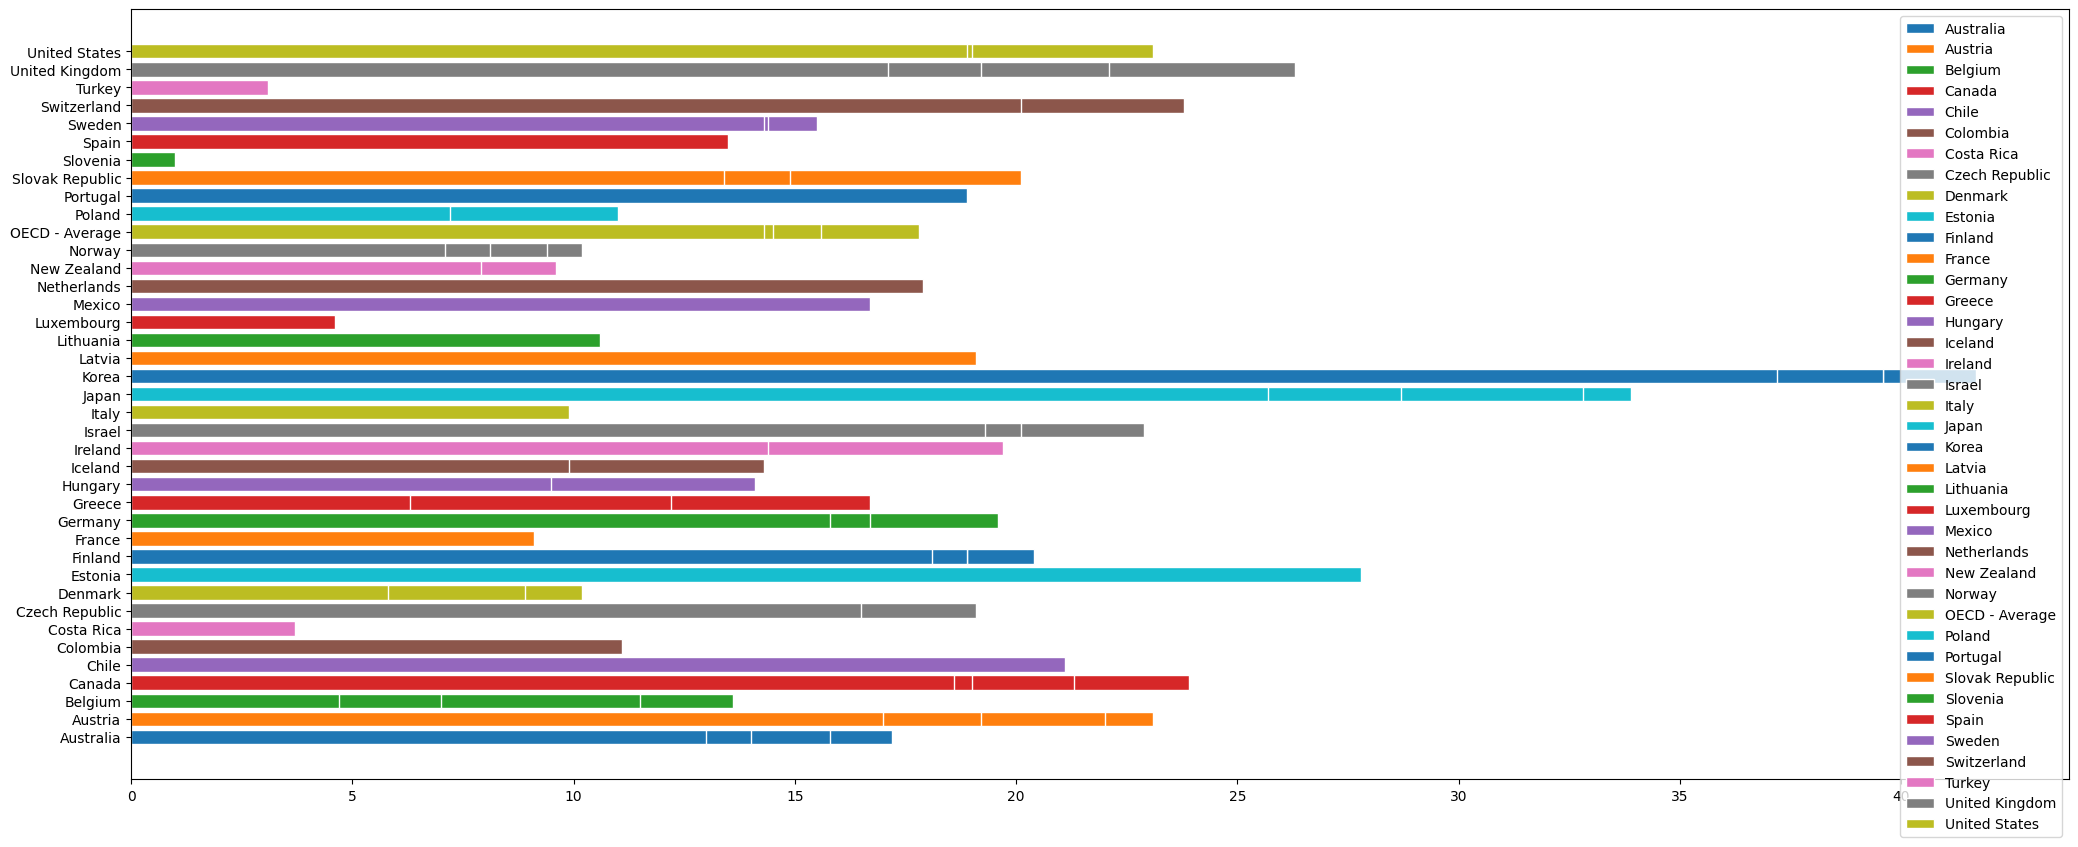

In [8]:
barWidth = 0.25
i = 0
count = 0

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

leg=[]
for key, value in data_grp:
    plt.barh(value['Country'], value['Value'], edgecolor='white')
    i += barWidth
    leg.append(key)
    
plt.legend(leg)
plt.show()

<ipython-input-12-fb3db116b541>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-fb3db116b541>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-fb3db116b541>:6: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

<ipython-input-12-fb3db116b541>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice f

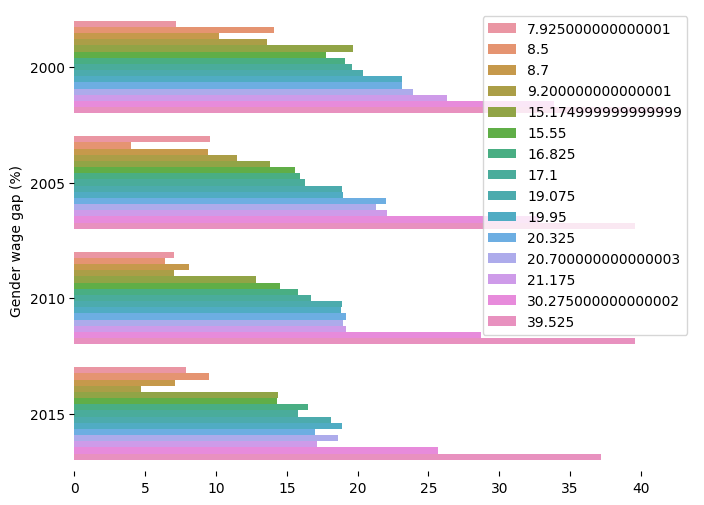

In [12]:
with4 = df2.groupby('Country')['Country'].count().reset_index(name='n')
with4 = with4[with4['n'] == 4]
df2 = df2[df2['Country'].isin(with4['Country'])]
df2['Country'] = df2['Country'].astype('category')
df2['TIME'] = df2['TIME'].astype('category')
df2['TIME'].cat.reorder_categories(df2['TIME'].cat.categories, inplace=True)
df2['Country'] = df2.groupby('Country')['Value'].transform(lambda x: x.mean())
df2.sort_values(by=['Country'],inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(x='Value', y='TIME', hue='Country', data=df2, dodge=True)
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('Gender wage gap (%)')
plt.legend(title='')